Chapter 6 - Linear Model Selection Regularization - Question 9

In [61]:
library(ISLR)
College = na.omit(College)
summary(College)

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

## (a)

In [62]:
#Creating a training data
set.seed(1)
size = nrow(College)
train = sample(1:size,size%/%2)

## (b)

In [63]:
lm.model = lm(Apps~.,data=College,subset=train)
summary(lm.model)


Call:
lm(formula = Apps ~ ., data = College, subset = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-5276.1  -473.2   -63.9   351.9  6574.0 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   78.15204  600.84427   0.130 0.896581    
PrivateYes  -757.22843  205.47577  -3.685 0.000263 ***
Accept         1.67981    0.05196  32.329  < 2e-16 ***
Enroll        -0.62380    0.27629  -2.258 0.024544 *  
Top10perc     67.45654    8.45231   7.981 1.84e-14 ***
Top25perc    -22.37500    6.57093  -3.405 0.000734 ***
F.Undergrad   -0.06126    0.05468  -1.120 0.263258    
P.Undergrad    0.04745    0.06248   0.760 0.448024    
Outstate      -0.09227    0.02889  -3.194 0.001524 ** 
Room.Board     0.24513    0.07300   3.358 0.000867 ***
Books          0.09086    0.36826   0.247 0.805254    
Personal       0.05886    0.09260   0.636 0.525455    
PhD           -8.89027    7.20890  -1.233 0.218271    
Terminal      -1.71947    8.22589  -0.209 0.834539    
S.F.

In [64]:
lm.pred = predict(lm.model,newdata=College[-train,])
#mean squared error of least squares error linear regression
mean((College[-train,]$Apps-lm.pred)^2)

[1] 1108531

## (c)

In [65]:
#Ridge regression
set.seed(1)
library(glmnet)
X = model.matrix(Apps~.,data=College)[,-1]
Y = College$Apps
ridge.model = cv.glmnet(X[train,],Y[train],alpha=0)
best.lambda=ridge.model$lambda.min
best.lambda

[1] 450.7435

In [66]:
coef.pred = predict(ridge.model,type="coefficients",s=best.lambda)
coef.pred

18 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept) -1.288649e+03
PrivateYes  -5.770077e+02
Accept       1.050525e+00
Enroll       4.327097e-01
Top10perc    3.471222e+01
Top25perc   -9.749468e-01
F.Undergrad  4.782044e-02
P.Undergrad  3.608026e-02
Outstate    -2.990017e-02
Room.Board   2.673197e-01
Books        2.359472e-01
Personal    -2.876617e-02
PhD         -2.473307e+00
Terminal    -6.512451e+00
S.F.Ratio    3.644556e-01
perc.alumni -9.203010e+00
Expend       5.267222e-02
Grad.Rate    9.729010e+00

In [67]:
ridge.pred = predict(ridge.model,newx=X[-train,],s=best.lambda)
#mean squared error of ridge regression
mean((ridge.pred-College[-train,]$Apps)^2)

[1] 1037616

## (d)

In [68]:
#Lasso
set.seed(1)
lasso.model = cv.glmnet(X[train,],Y[train],alpha=1)
best.lambda=lasso.model$lambda.min
best.lambda

[1] 24.62086

In [69]:
coef.pred = predict(lasso.model,type="coefficients",s=best.lambda)
coef.pred

18 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept) -3.647413e+02
PrivateYes  -5.247929e+02
Accept       1.559691e+00
Enroll      -4.540038e-01
Top10perc    5.009775e+01
Top25perc   -9.658886e+00
F.Undergrad -9.458964e-03
P.Undergrad  .           
Outstate    -5.722510e-02
Room.Board   1.949300e-01
Books        1.904476e-02
Personal     2.900426e-03
PhD         -4.617210e+00
Terminal    -3.139324e+00
S.F.Ratio    .           
perc.alumni -2.165766e+00
Expend       3.286831e-02
Grad.Rate    3.390476e+00

In [70]:
#number of non-zero coefficient estimates
length(coef.pred[coef.pred!=0])

<sparse>[ <logic> ] : .M.sub.i.logical() maybe inefficient


[1] 16

In [71]:
#mean squared test error
lasso.pred = predict(lasso.model,newx=X[-train,],s=best.lambda)
mean((lasso.pred-Y[-train])^2)

[1] 1030941

## (e)

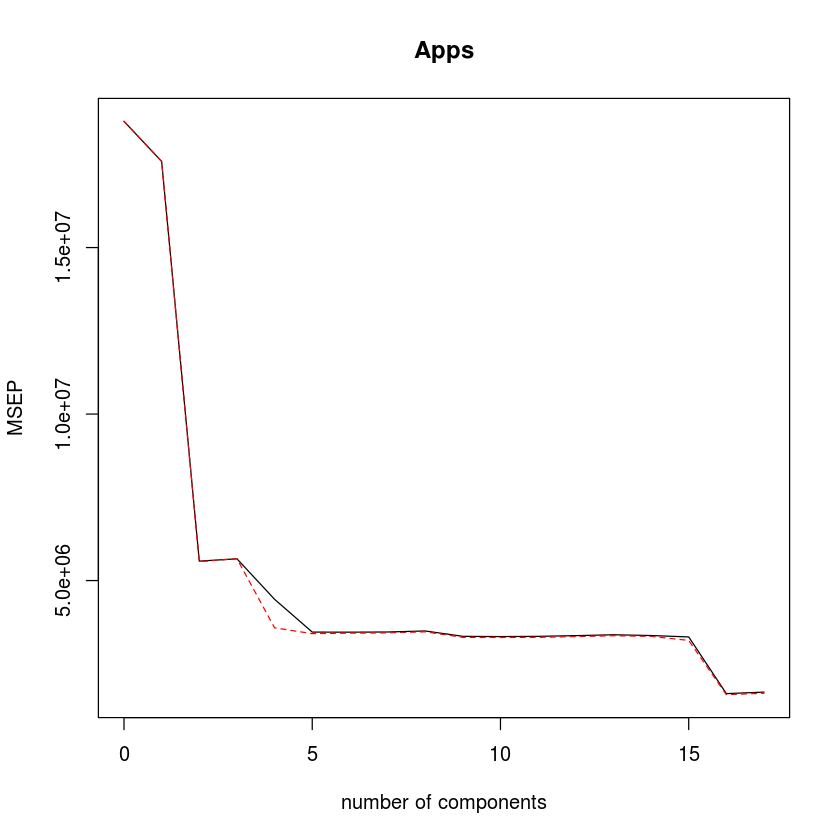

In [72]:
#Principal Component Analysis
library(pls)
pcr.model=pcr(Apps~.,data=College[train,],scale=TRUE,validation="CV")
validationplot(pcr.model,val.type="MSEP")

In [73]:
summary(pcr.model)

Data: 	X dimension: 388 17 
	Y dimension: 388 1
Fit method: svdpc
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            4335     4194     2363     2378     2106     1858     1858
adjCV         4335     4194     2359     2379     1892     1845     1850
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV        1859     1867     1824      1822      1824      1829      1837
adjCV     1852     1860     1815      1814      1815      1821      1828
       14 comps  15 comps  16 comps  17 comps
CV         1830      1819      1267      1285
adjCV      1823      1790      1255      1272

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X      31.216    57.68    64.73    70.55    76.33    81.30    85.01    88.40
Apps    6.976    71.47    71.58    83.32    83.44    83.45    83.46    83.4

As we see the lowest cross-validation error occurs when ncomp=16

In [74]:
#mean squared error pcr
pcr.pred = predict(pcr.model,newdata=College[-train,],ncomp=16)
mean((pcr.pred-College[-train,]$Apps)^2)

[1] 1166897

## (f)

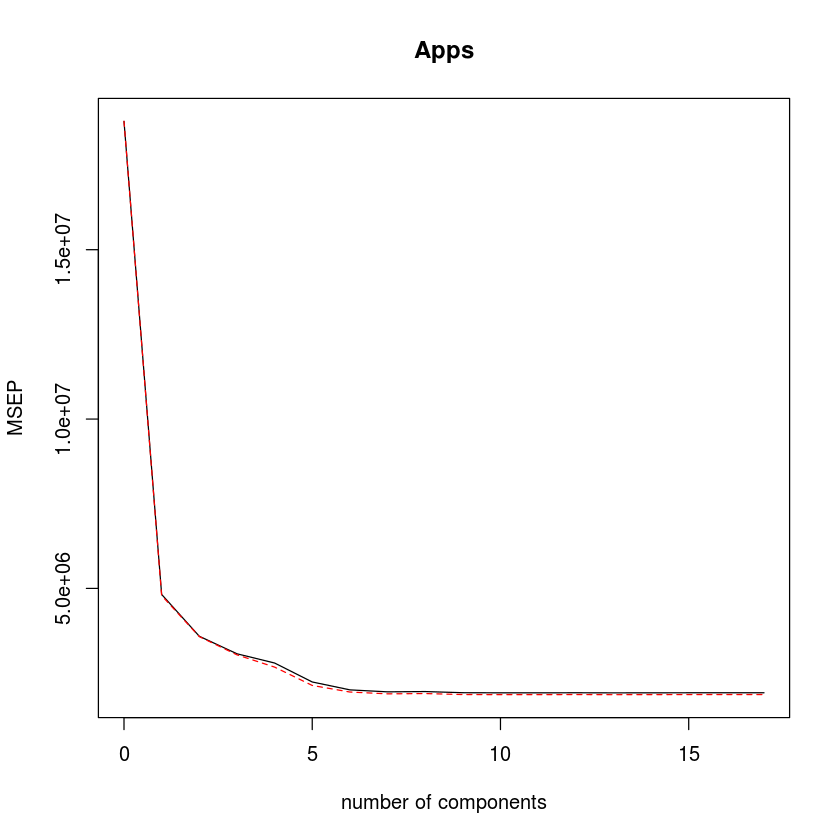

In [75]:
#Partial Least Square
pls.model = plsr(Apps~.,data=College[train,],scale=TRUE,validation="CV")
validationplot(pls.model,val.type="MSEP")

In [76]:
summary(pls.model)

Data: 	X dimension: 388 17 
	Y dimension: 388 1
Fit method: kernelpls
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            4335     2196     1894     1752     1672     1496     1416
adjCV         4335     2188     1891     1743     1636     1461     1393
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV        1395     1398     1386      1384      1384      1385      1384
adjCV     1374     1377     1366      1365      1365      1366      1365
       14 comps  15 comps  16 comps  17 comps
CV         1385      1385      1385      1385
adjCV      1365      1366      1366      1366

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X       26.91    43.08    63.26    65.16    68.50    73.75    76.10    79.03
Apps    76.64    83.93    87.14    91.90    93.49    93.85    93.91    

As we can see the lowest cross-validation error occurs when ncomp=11

In [77]:
#mean squared error on test data for pls
pls.pred = predict(pls.model,newdata=College[-train,],ncomp=11)
mean((pls.pred-College[-train,]$Apps)^2)

[1] 1128934

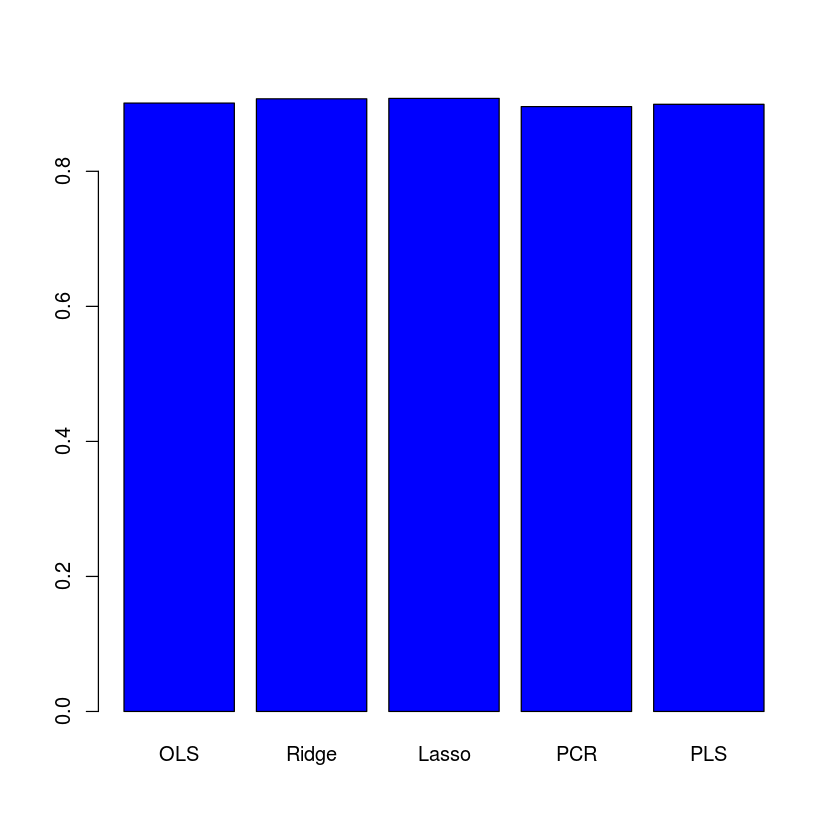

In [78]:
#R-squared
y = College[-train,]$Apps
#ols
lm.rsq = 1-sum((College[-train,]$Apps-lm.pred)^2)/sum((y-mean(y))^2)
#Ridge
ridge.rsq = 1-sum((College[-train,]$Apps-ridge.pred)^2)/sum((y-mean(y))^2)
#Lasso
lasso.rsq = 1-sum((College[-train,]$Apps-lasso.pred)^2)/sum((y-mean(y))^2)
#pcr
pcr.rsq = 1-sum((College[-train,]$Apps-pcr.pred)^2)/sum((y-mean(y))^2)
#pls
pls.rsq = 1-sum((College[-train,]$Apps-pls.pred)^2)/sum((y-mean(y))^2)
#barplot of R-square of all models on test data.
barplot(c(lm.rsq,ridge.rsq,lasso.rsq,pcr.rsq,pls.rsq),col="blue",names.arg=c("OLS","Ridge","Lasso","PCR","PLS"))

In [80]:
#R-square values
lm.rsq
ridge.rsq
lasso.rsq
pcr.rsq
pls.rsq

[1] 0.9010682

[1] 0.9073971

[1] 0.9079928

[1] 0.8958593

[1] 0.8992474

The R-square values of all models on test data are not very different from each other. PCR and PLS have slightly lower R-square.
The models explain about 89 to 90 percent of the variance in the data.